In [2]:
import qiskit, sys
import numpy as np
import qtm.qcompilation, qtm.ansatz, qtm.constant
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2
print(qtm.constant.noise_prob)

0.0


In [8]:
import shutil

def copy_and_rename_file(src_path, dest_path):
    try:
        shutil.copy2(src_path, dest_path)
        print("File copied successfully.")
        
    except FileNotFoundError:
        print("Source file not found.")
    except FileExistsError:
        print("Destination file already exists.")
for i in range(0,10):
# Example usage
    source_path = f'./noise_qng_polygon/{i}/loss_values{qtm.constant.noise_prob}_mitigating.csv'
    destination_path = f'./noise_qng_polygon/{i}/loss_values{qtm.constant.noise_prob}.csv'
    copy_and_rename_file(source_path, destination_path)
    source_path = f'./noise_qng_polygon/{i}/ce_values{qtm.constant.noise_prob}_mitigating_0.csv'
    destination_path = f'./noise_qng_polygon/{i}/ce_values{qtm.constant.noise_prob}_0.csv'
    copy_and_rename_file(source_path, destination_path)
    source_path = f'./noise_qng_polygon/{i}/fidelities{qtm.constant.noise_prob}_mitigating.csv'
    destination_path = f'./noise_qng_polygon/{i}/fidelities{qtm.constant.noise_prob}.csv'
    copy_and_rename_file(source_path, destination_path)
    source_path = f'./noise_qng_polygon/{i}/thetass{qtm.constant.noise_prob}_mitigating.csv'
    destination_path = f'./noise_qng_polygon/{i}/thetass{qtm.constant.noise_prob}.csv'
    copy_and_rename_file(source_path, destination_path)
    source_path = f'./noise_qng_polygon/{i}/traces{qtm.constant.noise_prob}_mitigating.csv'
    destination_path = f'./noise_qng_polygon/{i}/traces{qtm.constant.noise_prob}.csv'
    copy_and_rename_file(source_path, destination_path)

File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied 

In [ ]:
time = 10

for i in range(0, time):
    num_qubits = 5
    num_layers = 2
    thetas = np.ones(num_layers*num_qubits*2)

    compiler = qtm.qcompilation.QuantumCompilation(
        u = qtm.ansatz.create_polygongraph_ansatz,
        vdagger = qtm.state.create_ghz_state(num_qubits).inverse(),
        optimizer = 'qng_fubini_study',
        loss_func = 'loss_fubini_study',
        thetas = thetas,
        num_layers = num_layers
    )
    compiler.fit(num_steps=200, verbose = 1)
    compiler.save(path = f'./noise_qng_polygon/{i}', text=f'{qtm.constant.noise_prob}_mitigating', save_all = True)
    print(f"Done {time}!")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


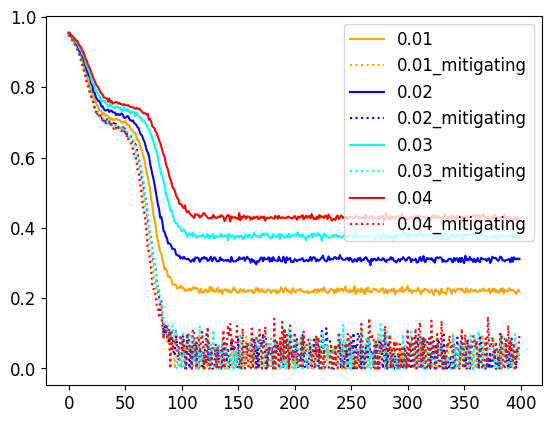

In [33]:
import pandas as pd
noises = [0.01, 0.02, 0.03, 0.04]
color = ["orange", "blue", "cyan", "red"]
i = 0
for noise in noises:
    loss = pd.read_csv("./tomography/noise_qng_polygon/loss_values" + str(noise) + ".csv", sep=",", header=None)
    plt.plot(loss, color = color[i], label = noise)
    loss_mitigating = pd.read_csv("./tomography/noise_qng_polygon/loss_values" + str(noise) + "_mitigating.csv", sep=",", header=None)
    plt.plot(loss_mitigating, color = color[i], linestyle = "dotted", label = str(noise) + '_mitigating')
    i = i + 1
plt.legend()
plt.savefig('compare_loss_mitigating.eps', format = 'eps', dpi = 1000)

In [7]:
print(losss_mitigating)

[]


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


[0.0, 0.10930185616484037, 0.17654879987263136, 0.22675950702382774, 0.26786021684598116]
[0.         0.05467656 0.06523775 0.07130502 0.07587968]
[0.0, 0.05979898727226496, 0.0799108778383614, 0.08949333934106336, 0.08159412260197708]
[0.         0.10228454 0.11574086 0.12176213 0.10942988]


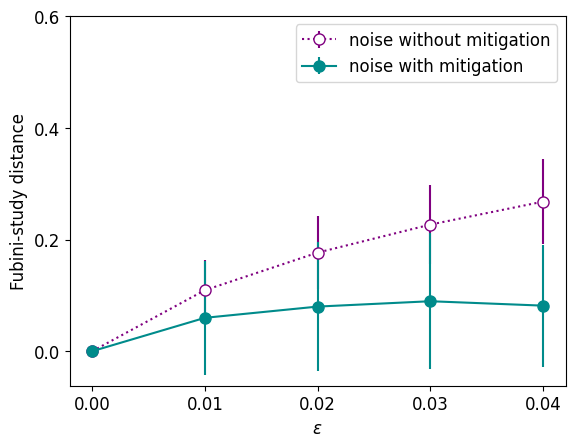

In [23]:
import pandas as pd
color = ["orange", "blue", "cyan", "red"]
losss = []
big_loss_mean = []
big_loss_std = []
losss_mitigating = []
big_loss_mitigating_mean = []
big_loss_mitigating_std = []
noises = [0.0, 0.01, 0.02, 0.03, 0.04]

for noise in noises:
    for i in range(0, 10):
        loss = pd.read_csv(f"./noise_qng_polygon/{i}/loss_values" + str(noise) + ".csv", sep=",", header=None)
        loss = np.asarray(loss)
        losss.append((loss[-1]))
        loss_mitigating = pd.read_csv(f"./noise_qng_polygon/{i}/loss_values" + str(noise) + "_mitigating.csv", sep=",", header=None)
        loss_mitigating = np.asarray(loss_mitigating)
        losss_mitigating.append((loss_mitigating[-1][0]))
    big_loss_mean.append(np.mean(losss))
    big_loss_std.append(np.std(losss))
    big_loss_mitigating_mean.append(np.mean(losss_mitigating))            
    big_loss_mitigating_std.append(np.std(losss_mitigating))

big_loss_mitigating_std = np.asarray(big_loss_mitigating_std)/2
big_loss_std = np.asarray(big_loss_std)/2

print(big_loss_mean)
print(big_loss_std)
print(big_loss_mitigating_mean)
print(big_loss_mitigating_std)
plt.errorbar(noises, big_loss_mean, yerr = big_loss_std, marker = 'o', mec = 'purple', color = 'purple', mfc = 'white', linestyle = 'dotted', markersize = 8, label = 'noise without mitigation')
plt.errorbar(noises, big_loss_mitigating_mean, yerr = big_loss_mitigating_std, color = 'darkcyan', marker = 'o', markersize = 8, label = 'noise with mitigation')
plt.xticks([0.0, 0.01, 0.02, 0.03, 0.04])
plt.yticks([0.0, 0.2, 0.4, 0.6])
plt.ylabel('Fubini-study distance')
plt.xlabel('$\epsilon$')
plt.rcParams.update({'font.size': 12})
plt.legend()
plt.savefig('min_loss_mitigating.eps', format = 'eps', dpi = 1000)

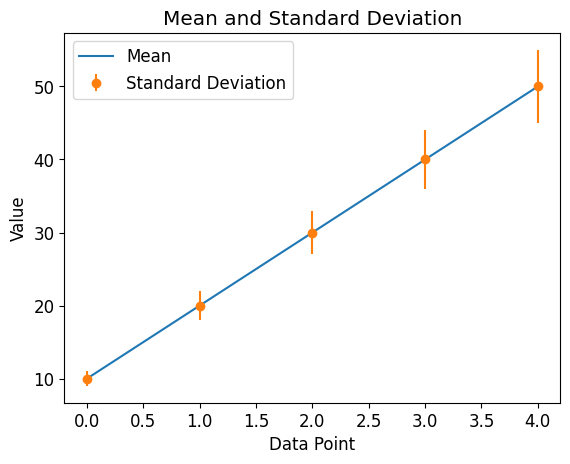

In [16]:
import matplotlib.pyplot as plt

# Example lists of mean values and standard deviations
mean_values = [10, 20, 30, 40, 50]
std_values = [1, 2, 3, 4, 5]

# Generate x-axis values (assuming equal spacing between data points)
x_values = range(len(mean_values))

# Plot the mean values as a line
plt.plot(x_values, mean_values, label='Mean')

# Plot the standard deviation values as error bars
plt.errorbar(x_values, mean_values, yerr=std_values, linestyle='None', marker='o', label='Standard Deviation')

# Set labels and title
plt.xlabel('Data Point')
plt.ylabel('Value')
plt.title('Mean and Standard Deviation')

# Display a legend
plt.legend()

# Display the plot
plt.show()
